In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from oset.generic.lp_filter.lp_filter_zero_phase import lp_filter_zero_phase
from oset.ecg.peak_detection.peak_detection_modified_pan_tompkins import (
    peak_detection_modified_pan_tompkins,
)

In [11]:
mat = scipy.io.loadmat("../../../datasets/sample-data/SampleECG1.mat")["data"][0]
f = 1
fc = 0.5
fs = 1000
t = np.arange(len(mat)) / fs
mat = mat - lp_filter_zero_phase(mat, fc / fs)  # filter
peaks, peak_indexes, _ = peak_detection_modified_pan_tompkins(mat, fs)

<Figure size 640x480 with 0 Axes>

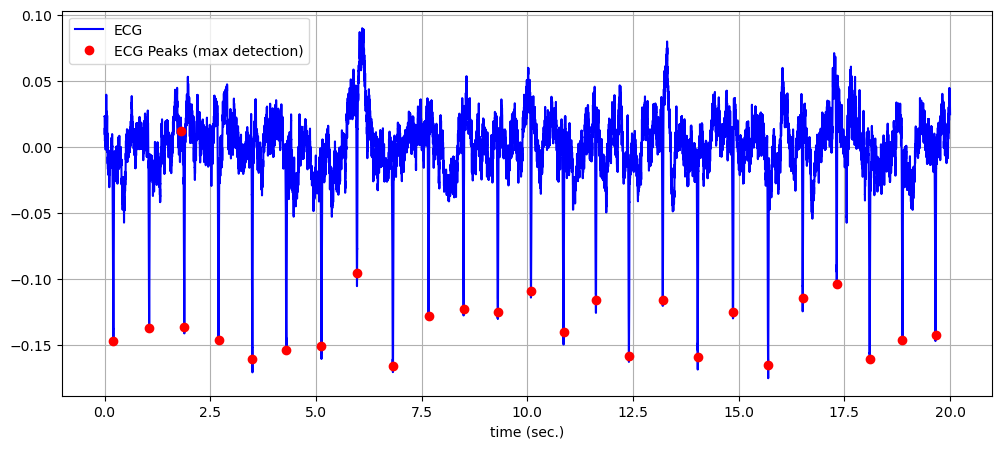

In [12]:
plt.figure()
plt.figure(figsize=(12, 5))
plt.plot(t, mat, "b", label="ECG")
peak_indexes = np.array(peak_indexes, dtype=np.int64)
plt.plot(t[peak_indexes], mat[peak_indexes], "ro", label="ECG Peaks (max detection)")
plt.xlabel("time (sec.)")
plt.legend()
plt.grid(True)
plt.show()